In [160]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import random

In [161]:
''' 
Setting of mixed extension of Nash Equilibrium
1.  Set N = {1, 2, · · · , n} of players 
2.  For each player i, a set P_i of all mixed strategies of player i
3.  For each player, a payoff function Hi : ∏i∈N P_i → R, where each Hi
is a linear combination of his with coefficients equal to product of the
corresponding probabilities
'''

ROCK, PAPER, SCISSORS, NUM_ACTIONS = 0, 1, 2, 3 
regretSum = np.zeros(NUM_ACTIONS)
strategy = np.zeros(NUM_ACTIONS)
strategySum = np.zeros(NUM_ACTIONS)
# Opponent uses the mixed strat (R, S, P) = (0.4, 0.3, 0.3)
oppStrategy = np.array([0.4, 0.3, 0.3])


In [162]:
# All possible payoffs for p1 
def value(p1, p2):
    if p1 == p2:
        return 0 
    if p1 == ROCK and p2 == SCISSORS:
        return 1
    if p1 == SCISSORS and p2 == PAPER:
        return 1
    if p1 == PAPER and p2 == ROCK:
        return 1
    else:
        return -1
    

In [163]:
# accmulate in stratSum
def getStrategy():
    global regretSum, strategySum
    strategy = np.maximum(regretSum, 0)
    normalizingSum = np.sum(strategy)
    if normalizingSum > 0:
        strategy /= normalizingSum
    else:
        strategy = np.ones(NUM_ACTIONS)/NUM_ACTIONS
    return strategy

def getAction(strategy):
    # Returns a random number in (0,1)
    strategy = strategy / np.sum(strategy)
    rr = random.random()
    return np.searchsorted(np.cumsum(strategy), rr)


-0.39

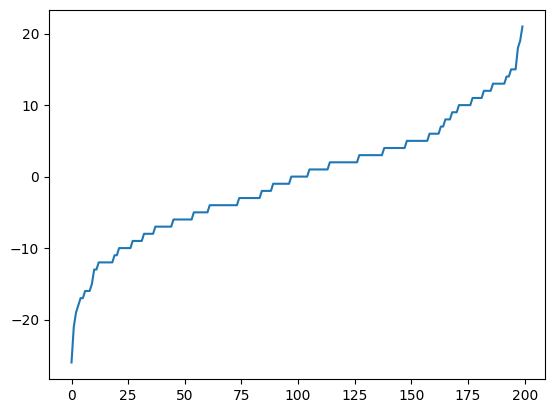

In [164]:
''' Checking the sample expectation of the MNE (1/3, 1/3, 1/3) (should be very close to 0) '''
vvv = []
# 200 rounds of RPS, each round 100 trials
for j in range(200):
    vv = 0 
    for i in range(100):
    #Get regret-matched mixed-strategy actions
        myStrat = getStrategy() # adopt the mixed strat (1/3, 1/3, 1/3)
        myAction = getAction(myStrat) # get random action from pdf
        oppAction = getAction(oppStrategy) # assume opponent uses mixed strat (0.4, 0.3, 0.3)
        vv += value(myAction, oppAction)
    vvv.append(vv)
plot(sorted(vvv))
np.mean(vvv)

In [167]:
# Construct training algorithm
def train(iterations):
    actionPayoff = np.zeros(NUM_ACTIONS)
    global regretSum
    
    for i in range(iterations):
        # Get regret-matched mixed strategy actions
        strategy = getStrategy()
        myAction = getAction(strategy)
        oppAction = getAction (oppStrategy)
        
        # Compute Action Payoffs (R0 P1 S2)
        '''Payoff of each possible action from the perspective of P1'''
        actionPayoff[oppAction] = 0 
        actionPayoff[(oppAction + 1) % NUM_ACTIONS] = 1
        ''' eg if opp choose S, we choose (2+2) mod 3 = P, then our payoff is -1 '''
        actionPayoff[(oppAction + 2) % NUM_ACTIONS] = -1
        
        # Accumulate Action Regrets 
        '''Compute the difference in actual and expected payoff (regret)'''
        regretSum += actionPayoff - actionPayoff[myAction]
            

train(100000), regretSum, np.sum(regretSum)

(None, array([-29927.,     61., -59924.]), -89790.0)

In [168]:
# use stratSum
def getAverageStrategy():
    
    normalizingSum = np.sum(regretSum)
    print(normalizingSum)
    if normalizingSum > 0:
        avgStrategy = regretSum / normalizingSum
    else:
        avgStrategy = np.ones(NUM_ACTIONS)/NUM_ACTIONS
    return avgStrategy



In [169]:
getAverageStrategy()

-89790.0


array([0.33333333, 0.33333333, 0.33333333])

In [ ]:
''' Checking the sample expectation of the MNE (1/3, 1/3, 1/3) (should be very close to 0) '''
vvv = []
# 200 rounds of RPS, each round 100 trials
for j in range(200):
    vv = 0 
    for i in range(100):
    #Get regret-matched mixed-strategy actions
        myStrat = getStrategy() # adopt the mixed strat (1/3, 1/3, 1/3)
        myAction = getAction(myStrat) # get random action from pdf
        oppAction = getAction(oppStrategy) # assume opponent uses mixed strat (0.4, 0.3, 0.3)
        vv += value(myAction, oppAction)
    vvv.append(vv)
plot(sorted(vvv))
np.mean(vvv)